# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   |     | |  |
|Produsentpris  | |   |  |
|Kvantum  |  |   |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||

In [149]:
#Legger til pakker
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

Oppgave 1

In [150]:
#Definerer tilbud- og etterspørselsfunksjon

def demand(x):
    return (500-x)/3.2

def supply(x, t):
    return ((100+x)/4.3)+t


#Definerer symboler for sympy

x, p, t = sp.symbols('x p t', positive=True, real=True)


In [151]:
#Lager likevektsfunksjon
equ=sp.Eq(demand(x),supply(x,t))

#sjekker funksjonen
equ

Eq(156.25 - 0.3125*x, t + 0.232558139534884*x + 23.2558139534884)

In [279]:
#Likevektspris
x_eq = sp.solve(equ, x)


#Likevektskvantum
p_eq = demand(x_eq[0])

print(f'''

Uttrykket for likevektspris med variabel {p_eq},

Uttrykket for likevektskvantum med variabel t {x_eq} 

''')




Uttrykket for likevektspris med variabel 0.573333333333333*t + 80.0,

Uttrykket for likevektskvantum med variabel t [244.0 - 1.83466666666667*t] 




Oppgave 2

In [230]:
#uttrykk for produsentoverskudd
producer_surplus=sp.integrate(p_eq-supply(x,t),(x,0,x_eq))
p_s = sp.simplify(producer_surplus)

p_s

-6922.79069767442*(1 - 0.00751912568306011*t)**2 + (56.7441860465116 - 0.426666666666667*t)*(244.0 - 1.83466666666667*t)

In [154]:
#uttrykk for konsumentoverskudd
consumer_surplus=sp.integrate(demand(x)-p_eq, (x,0,x_eq))
c_s = sp.simplify(consumer_surplus)

c_s

0.525937777777778*t**2 - 139.893333333333*t + 9302.5

In [155]:
#uttrykk for samfunnsoverskudd
welfare_surplus=sp.integrate(demand(x)-supply(x,t),(x,0,p_eq))
w_s = sp.simplify(welfare_surplus)

w_s

-0.662916666666667*t**2 - 28.75*t + 8895.3488372093

In [ ]:
#uttrykk for avgiftproveny
a_eq = sp.integrate(4, (x, 0, x_eq)) 



In [280]:
print(f'''

Uttrykket for KO er {c_s}

Utrykket for PO er {p_s}

Utrykket for Avgiftsproveny er {a_eq}

''')



Uttrykket for KO er 0.525937777777778*t**2 - 139.893333333333*t + 9302.5

Utrykket for PO er 0.391395555555555*t**2 - 104.106666666667*t + 6922.79069767442

Utrykket for Avgiftsproveny er 976.0 - 7.33866666666667*t




Oppgave 3

In [156]:
eq0 =sp.Eq(demand(x),supply(x,0))

eq0

Eq(156.25 - 0.3125*x, 0.232558139534884*x + 23.2558139534884)

In [157]:
x_eq0=sp.solve(eq0, x)
x_eq0=float(x_eq0[0])

x_eq0

243.99999999999997

In [158]:
p_eq0=demand(x_eq0)

p_eq0

80.0

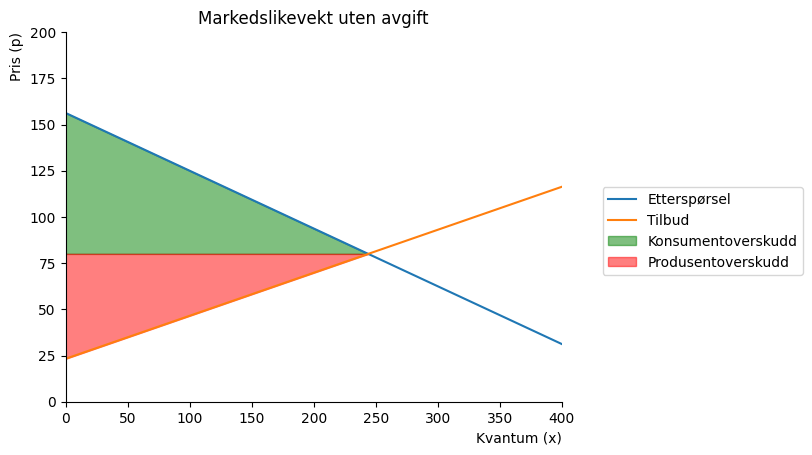

In [189]:
x_num=np.linspace(0.1, 400,100)

q = np.linspace(0,x_eq0,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(0,400))
                ax.set(ylim=(0,200))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen

ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num,0), label='Tilbud')
#tittel
ax.set_title('Markedslikevekt uten avgift')

#Fyller inn for po og ko
ax.fill_between(q, p_eq0, demand(q), color = "green",alpha = 0.5,label='Konsumentoverskudd')
ax.fill_between(q, supply(q, 0), p_eq0, color = "red",alpha = 0.5,label='Produsentoverskudd')

#legende
ax.legend(bbox_to_anchor=(1.5,0.6));

In [184]:
#lager ny ligning for t = 4
eq_4 = sp.Eq(demand(x),supply(x, 4))

#Finner verdi for pris
x_eq4 = sp.solve(eq_4,x)
x_eq4 = float(x_eq4[0])
x_eq4

236.66133333333332

In [185]:
#Finner verdi for pris
p_eq4=demand(x_eq4)
p_eq4

82.29333333333332

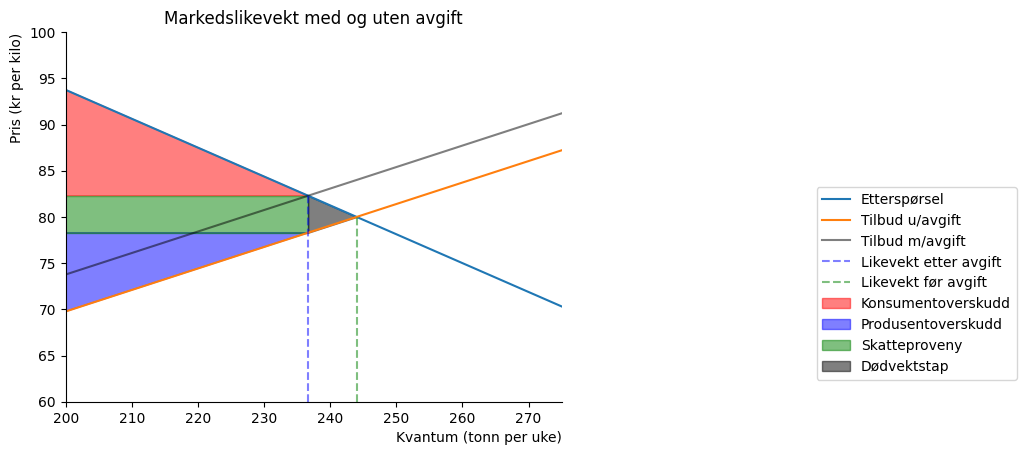

In [228]:
def create_ax_ny():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (kr per kilo)', loc='top')
                ax.set_xlabel('Kvantum (tonn per uke)', loc='right')
                ax.set(xlim=(200,275))
                ax.set(ylim=(60,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax_ny()

#plotter funksjonen
ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num, 0), label='Tilbud u/avgift')
ax.plot(x_num, supply(x_num, 4), color = "black", alpha=0.5, label='Tilbud m/avgift')
#tittel
ax.set_title('Markedslikevekt med og uten avgift')

#rekke med tall fra 0 til likevekt
q2 = np.linspace(0,x_eq4,100)

#rekke med tall fra likevekt med avgift til likevekt uten avgift
q3 = np.linspace(x_eq0,x_eq_t4,100)

#langer linjer til likevektspunktere
ax.vlines(x_eq4,60,demand(x_eq4), color='b',ls='dashed', alpha= 0.5, label='Likevekt etter avgift', clip_on=False)
ax.vlines(x_eq0,60,demand(x_eq0), color='g',ls='dashed', alpha= 0.5, label='Likevekt før avgift', clip_on=False)


#fill between til ko, po, skatt og dødvekt
ax.fill_between(q2,p_eq4,demand(q2), color = "r",alpha = 0.5,label='Konsumentoverskudd')
ax.fill_between(q2,supply(q2, 0),p_eq4-4, color = "b",alpha = 0.5,label='Produsentoverskudd')
ax.fill_between(q2,p_eq4,p_eq4-4, color = "g",alpha = 0.5,label='Skatteproveny')
ax.fill_between(q3,supply(q3, 0),demand(q3), color = "black",alpha = 0.5,label='Dødvektstap')

#legend
ax.legend(bbox_to_anchor=(1.5,0.6));

Oppgave 5

In [269]:
#gjør utregning for å finne ut pris/mengde med og uten avgift
cs0 =sp.integrate(demand(x)-p_eq0,(x,0,x_eq0)) #KO uten avgift

cs4 = sp.integrate(demand(x)-p_eq4,(x,0,x_eq4)) #KO med avgift

ps0 = sp.integrate(p_eq0-supply(x,0),(x,0,x_eq0)) #PO uten avgift

ps4 = sp.integrate(p_eq4-4-supply(x, 0),(x,0,x_eq4)) #PO med avgift

spn4 = sp.integrate(4, (x, 0, x_eq_t4)) #Skatteproveny med avgift

dvt4 = sp.integrate(demand(x) - supply(x, 0), (x, x_eq4, x_eq0))

In [277]:
#Importerer markdown
from IPython.display import Markdown

tbl=f"""
|                     | Før avgift              |Etter avgift       | Endring (etter avgift-før avgift) |
| :-------------------| :-------------------:|:--------------------:|:---------------------------------:|
| Konsumentpris:      | ${p_eq0}$            | ${round(p_eq4,2)}$   | ${round(p_eq4-p_eq0, 2)}$ |
| Produsentpris:      | ${p_eq0}$            | ${round(p_eq4,2)-4}$ | ${round(p_eq4-4-p_eq0, 2)}$ |
| Kvantum:            | ${round(x_eq0,2)}$   | ${round(x_eq4,2)}$   | ${round(x_eq4-x_eq0, 2)}$ |
| Konsumentoverskudd: | ${round(cs0,2)}$     | ${round(cs4,2)}$     | ${round(cs4-cs0,2)}$ |
| Produsentoverskudd: | ${round(ps0,2)}$     | ${round(ps4,2)}$     | ${round(ps4-ps0,2)}$ |
| KO + PO:            | ${round(ps0+cs0,2)}$ | ${round(ps4+cs4,2)}$ | ${round((round(ps4-ps0,2))+(round(cs4-cs0,2)),2)}$ |
| Skatteproveny :     | ${0}$                | ${round(spn4,2)}$    | ${round(spn4,2)-0}$ |
| Dødvektstap:        | ${0}$                | ${round(dvt4,2)}$    | ${round(dvt4,2)-0}$ |
"""
display(Markdown(tbl))


|                     | Før avgift              |Etter avgift       | Endring (etter avgift-før avgift) |
| :-------------------| :-------------------:|:--------------------:|:---------------------------------:|
| Konsumentpris:      | $80.0$            | $82.29$   | $2.29$ |
| Produsentpris:      | $80.0$            | $78.29$ | $-1.71$ |
| Kvantum:            | $244.0$   | $236.66$   | $-7.34$ |
| Konsumentoverskudd: | $9302.50$     | $8751.34$     | $-551.16$ |
| Produsentoverskudd: | $6922.79$     | $6512.63$     | $-410.16$ |
| KO + PO:            | $16225.29$ | $15263.97$ | $-961.32$ |
| Skatteproveny :     | $0$                | $946.65$    | $946.65$ |
| Dødvektstap:        | $0$                | $14.68$    | $14.68$ |
